In [19]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import complex_ode
from scipy.integrate import ode
from scipy.integrate import odeint
from scipy.linalg import circulant
mode_index = np.arange(-40,41,1,int)
simulation_time = np.arange(0,16,1,int)

In [20]:
y = np.zeros(5)
y[1] = y[4] =1
Y = circulant(y)
print (Y)
x = np.zeros(5)
x[3] = 3
x[2] = 2
print (x)
print (x@Y)


i_ind = np.zeros(81)
for i in range (i_ind.size):
    i_ind[i] = i-40
print (i_ind)
print ((i_ind*i_ind).shape)


#if (abs(i_ind[j]+ i_ind[k]- i_ind[i])<=40):

[[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]]
[0. 0. 2. 3. 0.]
[0. 2. 3. 2. 3.]
[-40. -39. -38. -37. -36. -35. -34. -33. -32. -31. -30. -29. -28. -27.
 -26. -25. -24. -23. -22. -21. -20. -19. -18. -17. -16. -15. -14. -13.
 -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.
   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.]
(81,)


# 1. Dispersion + Coupling

Original condition: a_0 = 1. The following codes solve the ODEs consisting of 80 model indexs coming from the LLE.

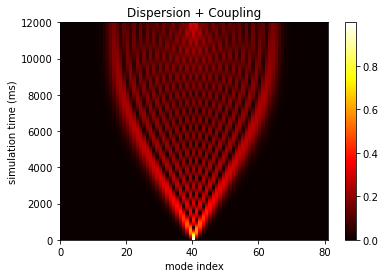

In [21]:
temp = np.zeros(81)
temp[1] = temp[80] =1.7
J = circulant(temp)

i_ind = np.zeros(81)
for i in range (i_ind.size):
    i_ind[i] = i-40

    
def lle_dis_cou (t,a):
    #da = np.array([complex(0, 0) for i in range(81)])
    da = 1j * 0.01 * (i_ind*i_ind) * a + 1j * J @ a
    return da

#a_initial = np.zeros(81)

a_initial = np.array([complex(0, 0) for i in range(81)])
a_initial[40] +=1 
t = np.linspace(0, 11, 1000)

r = complex_ode(lle_dis_cou)
r.set_initial_value(a_initial, 0)

t1 = 12
dt=0.001

tt = []
aaa = []

while r.successful() and r.t < t1:
    x = r.t+dt
    y = r.integrate(x)
    aaa.append (y)
    tt.append (x)

aaa_amp = np.zeros((len(aaa),len(aaa[0])))
for i in range (len(aaa)):
    for j in range (len(aaa[0])):
        aaa_amp[i][j] = abs(aaa[i][j])

        
p1 = plt.pcolormesh(aaa_amp, cmap='hot')
plt.colorbar(p1)
plt.title('Dispersion + Coupling')
plt.xlabel('mode index')
plt.ylabel('simulation time (ms)')
plt.show()

# 2. Nonlinearity

In [22]:
g = 0.1

i_ind = np.zeros(81)
for i in range (i_ind.size):
    i_ind[i] = i-40


def lle_nonlinear (t,a):
    da = np.array([complex(0, 0) for i in range(81)])
    for i in range (len(da)):
        for j in range (len(da)):
            for k in range (len(da)):
                if (0<= j+k-i <=80):
                    da[i] = da[i] + 1j* g * a[j] * a[k] * np.conj(a[j+k-i])
    return da


a_initial = np.array([complex(0, 0) for i in range(81)])
a_initial[40] +=1 
a_initial[42] +=1 


r = complex_ode(lle_nonlinear)
r.set_initial_value(a_initial, 0)

t1 = 12
dt=0.1

tt = []
aaa = []

while r.successful() and r.t < t1:
    #print (r.t)
    x = r.t+dt
    y = r.integrate(x)
    aaa.append (y)
    tt.append (x)
    
print (len(aaa))
print (len(aaa[0]))
aaa_amp_nl = np.zeros((len(aaa),len(aaa[0])))


for i in range (len(aaa)):
    for j in range (len(aaa[0])):
        aaa_amp_nl[i][j] = abs(aaa[i][j])

#for i in range (len(aaa_amp)):


#print (aaa_amp[:,9])   
#print (aaa_amp[:,10])
#print (aaa_amp[:,11]) 

121
81


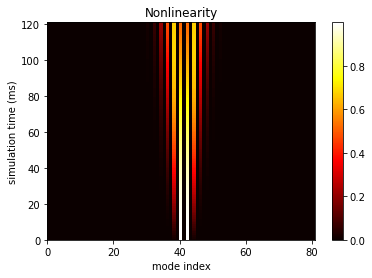

In [25]:
p1 = plt.pcolormesh(aaa_amp_nl, cmap='hot')
plt.colorbar(p1)
plt.title('Nonlinearity')
plt.xlabel('mode index')
plt.ylabel('simulation time (ms)')
plt.show()

# 3. Dispersion + Nonlinearity

In [26]:
g = 0.1

i_ind = np.zeros(81)
for i in range (i_ind.size):
    i_ind[i] = i-40


def lle_nonlinear (t,a):
    da = 1j * 0.01 * (i_ind*i_ind) * a
    for i in range (len(da)):
        for j in range (len(da)):
            for k in range (len(da)):
                if (0<= j+k-i <=80):
                    da[i] = da[i] + 1j* g * a[j] * a[k] * np.conj(a[j+k-i])
    return da


a_initial = np.array([complex(0, 0) for i in range(81)])
a_initial[40] +=1 
a_initial[42] +=1 


r = complex_ode(lle_nonlinear)
r.set_initial_value(a_initial, 0)

t1 = 15
dt=0.1

tt = []
aaa = []

while r.successful() and r.t < t1:
    #print (r.t)
    x = r.t+dt
    y = r.integrate(x)
    aaa.append (y)
    tt.append (x)
    
print (len(aaa))
print (len(aaa[0]))
aaa_amp_dp_nl = np.zeros((len(aaa),len(aaa[0])))


for i in range (len(aaa)):
    for j in range (len(aaa[0])):
        aaa_amp_dp_nl[i][j] = abs(aaa[i][j])

#for i in range (len(aaa_amp)):


#print (aaa_amp[:,9])   
#print (aaa_amp[:,10])
#print (aaa_amp[:,11]) 

151
81


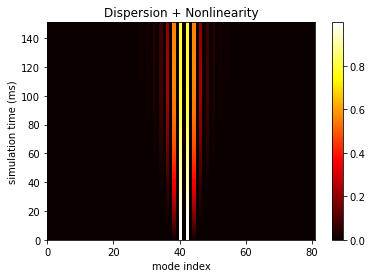

In [27]:
p1 = plt.pcolormesh(aaa_amp_dp_nl, cmap='hot')
plt.colorbar(p1)
plt.title('Dispersion + Nonlinearity')
plt.xlabel('mode index')
plt.ylabel('simulation time (ms)')
plt.show()

# 4. All but loss

In [28]:
g = 0.1

i_ind = np.zeros(81)
for i in range (i_ind.size):
    i_ind[i] = i-40


def lle_nonlinear (t,a):
    da = 1j * 0.01 * (i_ind*i_ind) * a + 1j * J @ a
    for i in range (len(da)):
        for j in range (len(da)):
            for k in range (len(da)):
                if (0<= j+k-i <=80):
                    da[i] = da[i] + 1j* g * a[j] * a[k] * np.conj(a[j+k-i])
    return da


a_initial = np.array([complex(0, 0) for i in range(81)])
a_initial[40] +=1 
a_initial[42] +=1 


r = complex_ode(lle_nonlinear)
r.set_initial_value(a_initial, 0)

t1 = 15
dt=0.1

tt = []
aaa = []

while r.successful() and r.t < t1:
    #print (r.t)
    x = r.t+dt
    y = r.integrate(x)
    aaa.append (y)
    tt.append (x)
    
print (len(aaa))
print (len(aaa[0]))
aaa_amp_all = np.zeros((len(aaa),len(aaa[0])))


for i in range (len(aaa)):
    for j in range (len(aaa[0])):
        aaa_amp_all[i][j] = abs(aaa[i][j])

#for i in range (len(aaa_amp)):


#print (aaa_amp[:,9])   
#print (aaa_amp[:,10])
#print (aaa_amp[:,11]) 

151
81


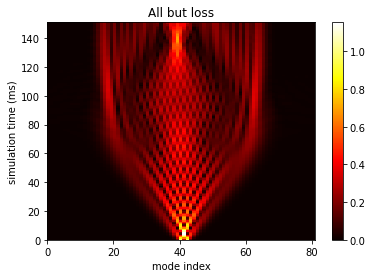

In [29]:
p1 = plt.pcolormesh(aaa_amp_all, cmap='hot')
plt.colorbar(p1)
plt.title('All but loss')
plt.xlabel('mode index')
plt.ylabel('simulation time (ms)')
plt.show()